# Importing the libraries

In [1]:
pip install --upgrade torch torchvision

     |████████████████████████████████| 881.9 MB 11 kB/s             
     |████████████████████████████████| 23.3 MB 33.7 MB/s            
  Attempting uninstall: torch
    Found existing installation: torch 1.9.1+cpu
    Uninstalling torch-1.9.1+cpu:
      Successfully uninstalled torch-1.9.1+cpu
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.1+cpu
    Uninstalling torchvision-0.10.1+cpu:
      Successfully uninstalled torchvision-0.10.1+cpu
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.1 requires torch==1.9.1, but you have torch 1.10.1 which is incompatible.
torchaudio 0.9.1 requires torch==1.9.1, but you have torch 1.10.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# PyTorch libraries
import torch
from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes
import torchvision.transforms.functional as F

# Plot libraries
import matplotlib.pyplot as plt

# Other libraries
import requests

# Function definitions

In [3]:
# Function to display an image
def show_image(image):
    # Convert image
    image = F.to_pil_image(image)
    
    # Show image
    fig = plt.figure(figsize=(20, 15))
    plt.grid(False)
    plt.imshow(image)

In [4]:
# Function to draw a bounding box on an image based on some parameters
def draw_bounding_box(image_path, results_df, color = 'red', thickness = 4): 
    # Read image
    image = read_image(image_path)
    
    # Display image with bounding boxes
    image = draw_bounding_boxes(image, torch.tensor(results_df[['xmin', 'ymin', 'xmax', 'ymax']].values), 
                                colors = color, width = thickness, labels = results_df['name'].to_list())
    show_image(image)

# Show test image

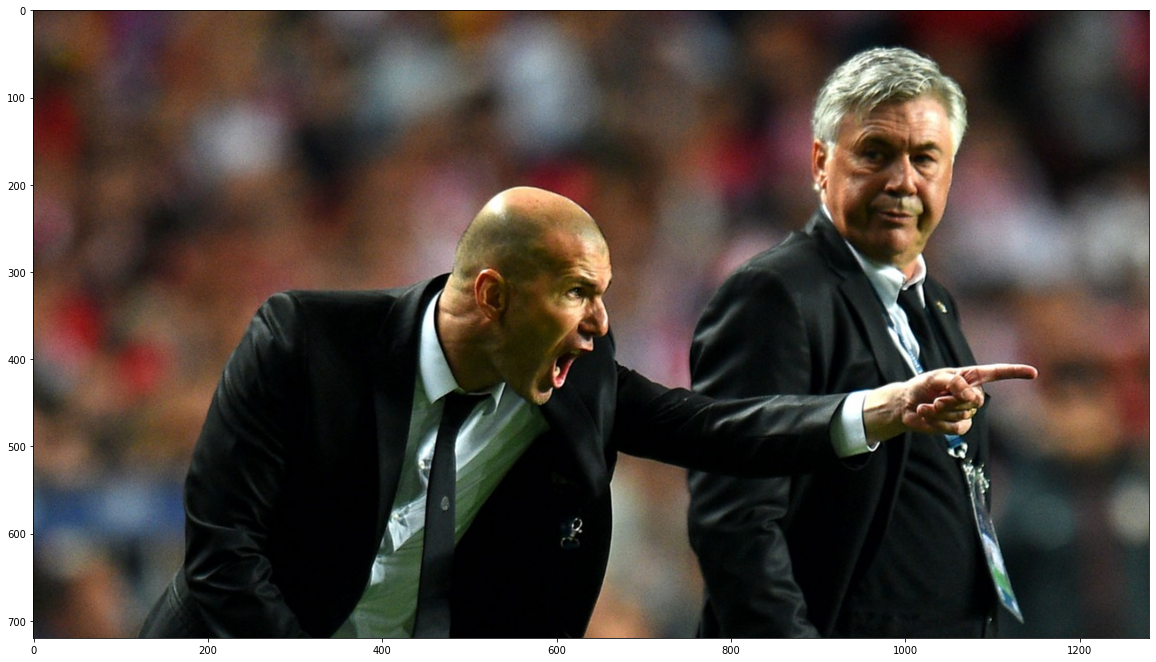

In [5]:
# Download image
img_data = requests.get('https://ultralytics.com/images/zidane.jpg').content
with open('zidane.jpg', 'wb') as handler:
    handler.write(img_data)
    
# Show image
show_image(read_image('zidane.jpg'))

# Load an run the model

In [6]:
# Loading the model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained = True)

# Load a test image
imgs = ['https://ultralytics.com/images/zidane.jpg']

# Inference
results = model(imgs)

# Print results
results.print()
results_df = results.pandas().xyxy[0]
results_df

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip


requirements: torch>=1.7.0 not found and is required by YOLOv5, attempting auto-update...



requirements: torchvision>=0.8.1 not found and is required by YOLOv5, attempting auto-update...


YOLOv5 🚀 2022-1-21 torch 1.10.1+cu102 CPU




requirements: 2 packages updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



  0%|          | 0.00/14.0M [00:00<?, ?B/s]

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


/opt/conda/lib/python3.7/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
image 1/1: 720x1280 2 persons, 1 tie
Speed: 392.2ms pre-process, 143.5ms inference, 1.4ms NMS per image at shape (1, 3, 384, 640)


,xmin,ymin,xmax,ymax,confidence,class,name
0,751.908264,45.572388,1148.552246,716.217957,0.875047,0,person
1,100.012695,201.289734,1002.052246,718.762939,0.579518,0,person
2,438.405090,421.902405,509.924805,720.000000,0.522343,27,tie


# Showing the results

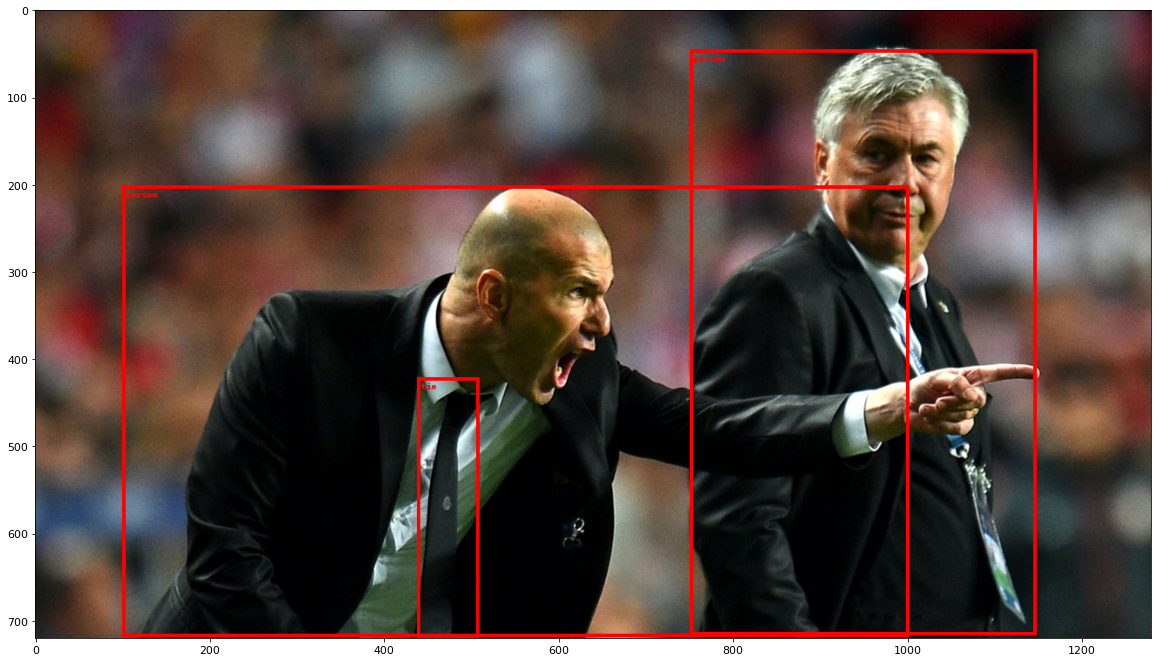

In [7]:
# Show image with bounding boxes
draw_bounding_box('zidane.jpg', results_df)